First we will start off by loading in our data and seeing all the different columns we are working with.

In our case we are trying to predict star types, since machine learning alogrithms can only work with number we will give each star type a number:
- Red Dwarf: 0
- Brown Dwarf: 1
- White Dwarf: 2
- Main Sequence: 3
- SuperGiants: 4
- HyperGiants: 5

In [21]:
import pandas as pd

data = pd.read_csv('data/star_classification.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Using info function of a dataframe we can number of entries, type of each column, and how many null items there are

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


The describe function can give us statistical information of all the columns in the data

In [23]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


This will let us see how many empty values we have in each column

In [24]:
data.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

We don't need Star color and Spectral Class as those are non numerical datatypes that won't help us

In [25]:
data = data.drop(['Star color', 'Spectral Class'], axis=1)

We can now split our data into an X (every column but Star type) and Y (only star type column)

In [26]:
x = data.drop(['Star type'], axis=1)
y = data['Star type']

Using pairplot we can show the relationship between each column on a graph, and seaborn picks the best graph to represent the data and most of the time it is either a scatter plot or a continous line graph.

The Hue option just colors it based on the column, here we are coloring each data point according to the star type

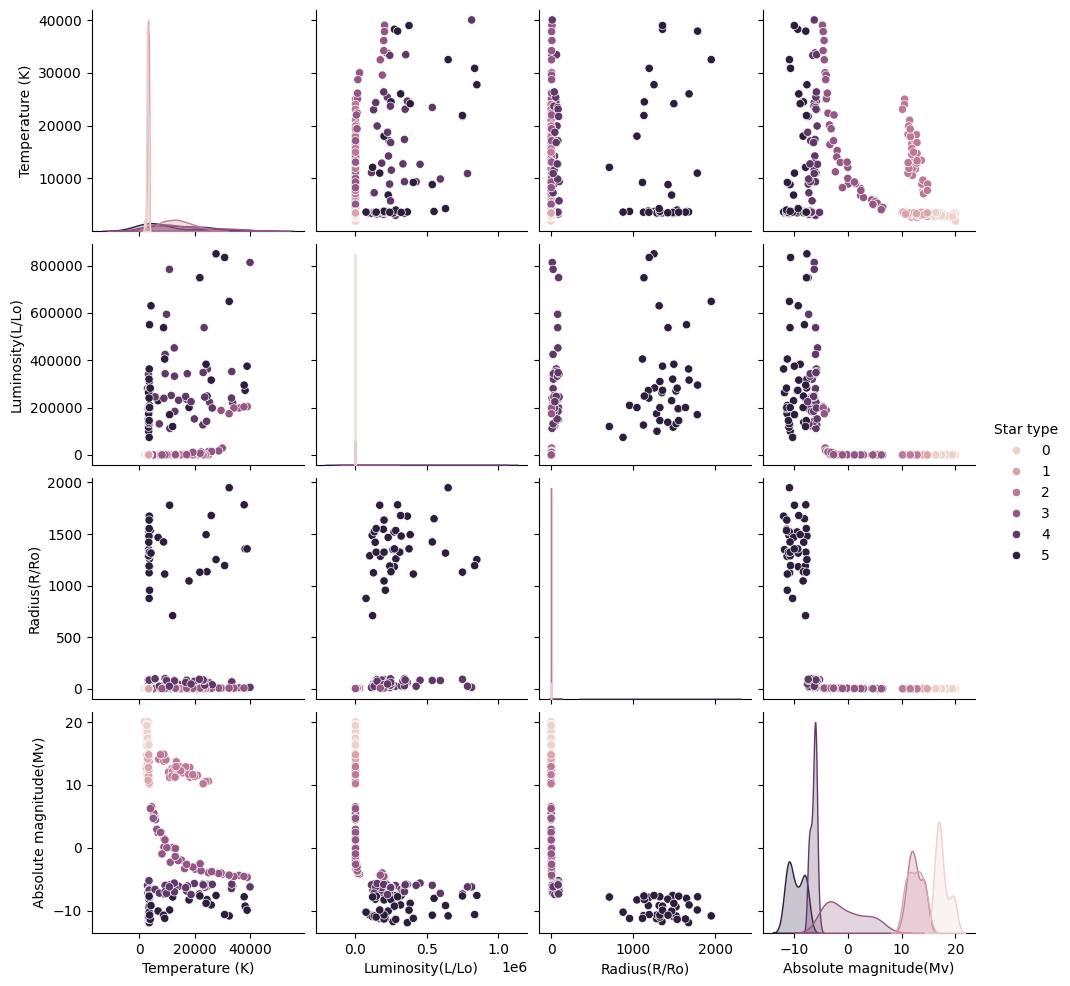

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, hue='Star type')
plt.show()

Using seaborn's heatmap graph, we can see the correlation between the features.

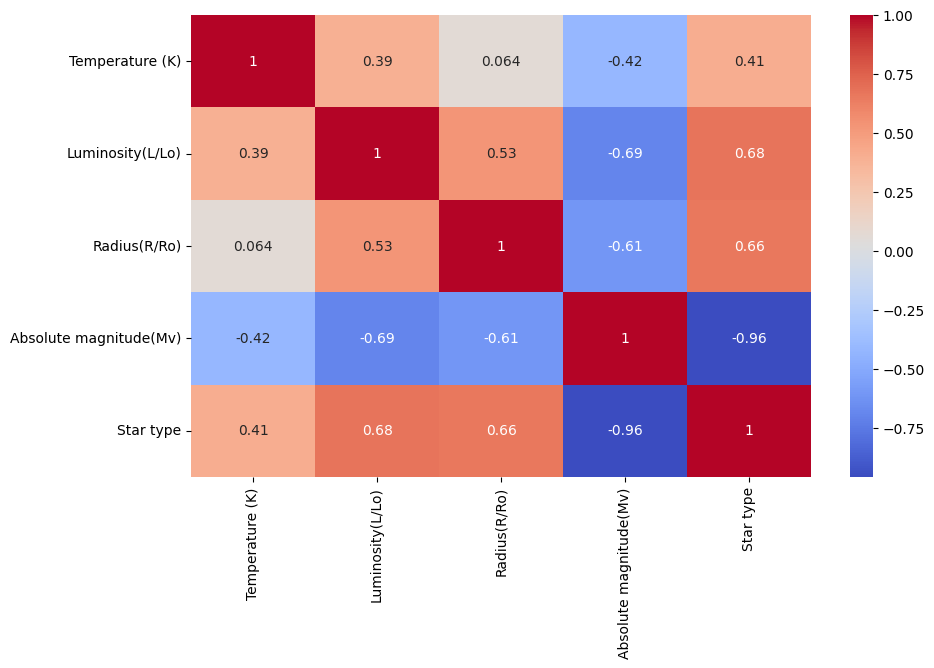

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Now we will split the data into training and testing sets using the train_test_split function from the sklearn.model_selection module.

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

A standard scaler scales the data to fit between a certain range, this is done by removing the mean and using the z-score for each datapoint.

Here we are only scaling the other features and not the target features

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

The first model we will try is the K-Nearest Neighbors algorithm. This model is based on the distance between the data points. The algorithm calculates the distance between the new data point and all the other data points in the training set. It then selects the K-nearest data points and assigns the new data point to the class that is most common among those K-nearest data points.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

After fitting our model to the training dataset we can run a classification report to check the accuracy of the model.

The different meterics are:
- Precision: metric that measures how often a model correctly predicts a positive class
- Recall: metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset
- F1-Score: This is the average of precision and recall
- Support: it is the number of instances in each class.

In [32]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.67      0.50      0.57        12
           2       0.77      1.00      0.87        10
           3       1.00      0.70      0.82        10
           4       0.33      0.55      0.41        11
           5       0.38      0.20      0.26        15

    accuracy                           0.60        72
   macro avg       0.63      0.62      0.61        72
weighted avg       0.61      0.60      0.59        72



A confusion matrix is like a scorecard that shows how well a machine learning model is doing when it tries to sort things into categories.

The confusion matrix is a table with four sections:
- Top left (True Positives): The number of times the model correctly said something was an apple when it was actually an apple.
- Bottom right (True Negatives): The number of times the model correctly said something was an orange when it was actually an orange.
- Top right (False Positives): The number of times the model wrongly said something was an apple when it was actually an orange.
- Bottom left (False Negatives): The number of times the model wrongly said something was an orange when it was actually an apple.

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  3,  0,  0,  0,  0],
       [ 6,  6,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  3,  7,  0,  0],
       [ 0,  0,  0,  0,  6,  5],
       [ 0,  0,  0,  0, 12,  3]])

Since the printed array looks messy and you can't tell what is it supposed to represent, so we will use a graph to show it. On the graph the vertical axis represents the true labels, or the correct answers, while the horizontal axis represents the prediction of the algorithm.

Using this we can see what star types the model gets confused with, the graph shows:
- the model confuses 0 with 1, 3 times
- the model confuses 1 for 0, 6 times
- the model predicts 2 correctly all 10 times
- the model confuses 3 with 2, 3 times
- the model confuses 4 with 5, 5 times
- the model confuses 5 with 4, 12 times

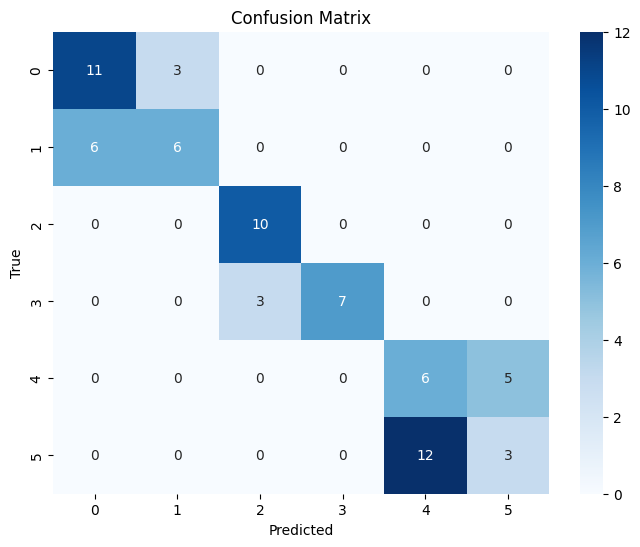

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[*data['Star type'].unique()], yticklabels=[*data['Star type'].unique()])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Since the previous model has subpar accuracy and confuses star types alot we can try a new model. Since we are trying to classify data into single digits (0-5 in our case) we can using a RandomForest as these are great for classification task.

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

The classification report for random forests is much better than the KNearest model, it has 100% accuracy for every star type

In [36]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0, 15]])

The confusion matrix shows that the model never confuses any star types for other types, showing that we don't need to try a new model

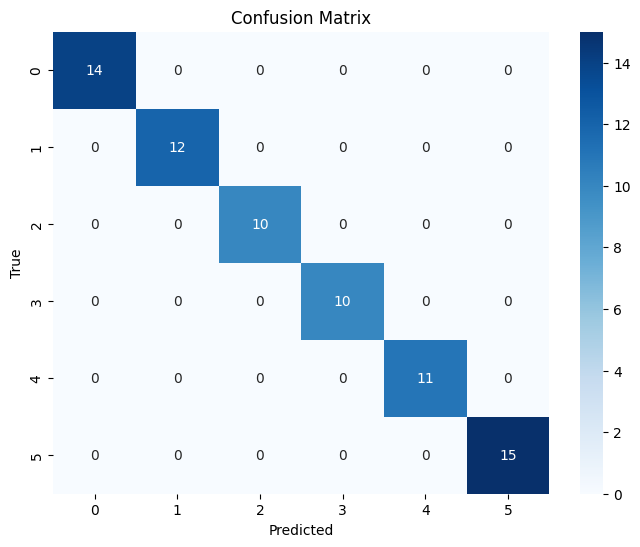

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[*data['Star type'].unique()], yticklabels=[*data['Star type'].unique()])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()